# Prenom : Doudou
# Nom : Cissé Faye

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,RidgeCV,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1=pd.read_csv('claims_freq.csv')
df2=pd.read_csv('claims_cost.csv')

In [6]:
df1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,'D',5,0,55,50,'B12','Regular',1217,'R82'
1,3.0,1,0.77,'D',5,0,55,50,'B12','Regular',1217,'R82'
2,5.0,1,0.75,'B',6,2,52,50,'B12','Diesel',54,'R22'
3,10.0,1,0.09,'B',7,0,46,50,'B12','Diesel',76,'R72'
4,11.0,1,0.84,'B',7,0,46,50,'B12','Diesel',76,'R72'


In [7]:
df2.head()

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00


<font size='+4' color='yellow' >Fusion des deux datasets <font/>

# Partie 1 : Introduction et Préparation des Données

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


In [9]:
nbre_val_manquantes = pd.DataFrame(df1.isna().sum().sort_values())
nbre_val_manquantes.columns = ['Valeurs manquantes par feature']
nbre_val_manquantes

,Valeurs manquantes par feature
IDpol,0
ClaimNb,0
Exposure,0
Area,0
VehPower,0
VehAge,0
DrivAge,0
BonusMalus,0
VehBrand,0
VehGas,0


In [10]:
nbre_val_manquantes = pd.DataFrame(df2.isna().sum().sort_values())
nbre_val_manquantes.columns = ['Valeurs manquantes par feature']
nbre_val_manquantes

,Valeurs manquantes par feature
IDpol,0
ClaimAmount,0


<font size='+4' color='green' >Pas de valeur manquante dans les datasets <font/>

<Axes: ylabel='VehAge'>

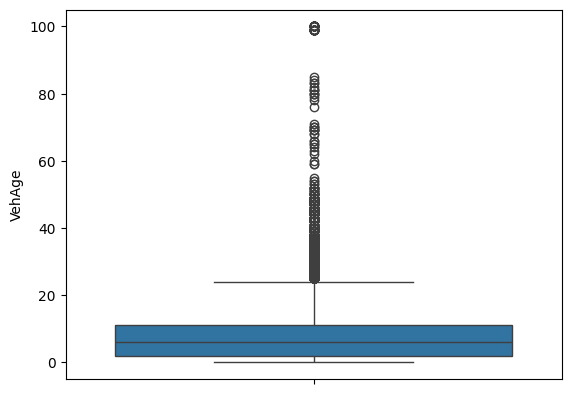

In [11]:
sns.boxplot(df1['VehAge'])

<Axes: ylabel='DrivAge'>

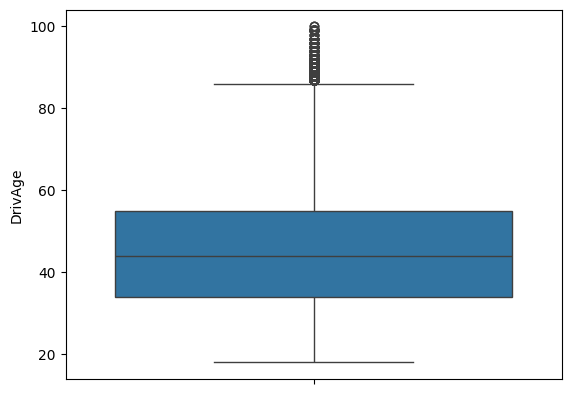

In [12]:
sns.boxplot(df1['DrivAge'])

<font size='+4' color='yellow' >Fusion des deux datasets <font/>

In [13]:
df_merge=pd.merge(df1,df2,how='inner',on='IDpol')

<font size='+4' color='yellow' >Distribution de l'age des vehicules <font/>

<Axes: xlabel='VehAge', ylabel='Density'>

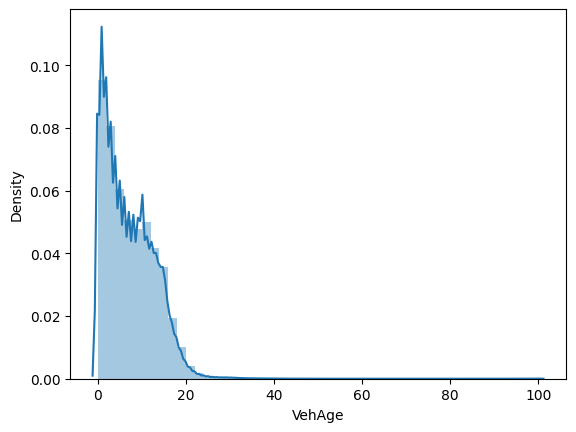

In [14]:
sns.distplot(df1['VehAge'])

<font size='+4' color='yellow' >Distribution de l'age des assurés <font/>

<Axes: xlabel='DrivAge', ylabel='Density'>

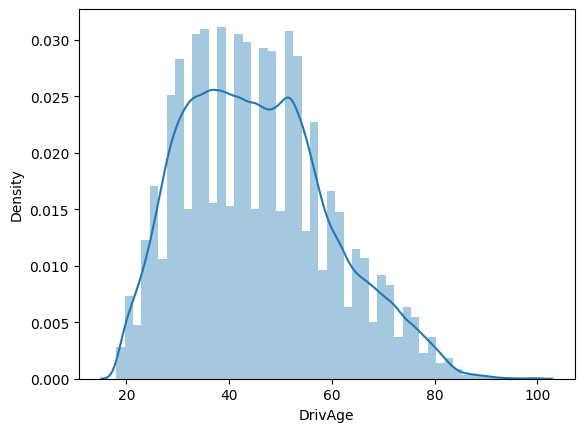

In [15]:
sns.distplot(df1['DrivAge'])

<font size='+4' color='yellow' >Repartition des marques des véhicules <font/>

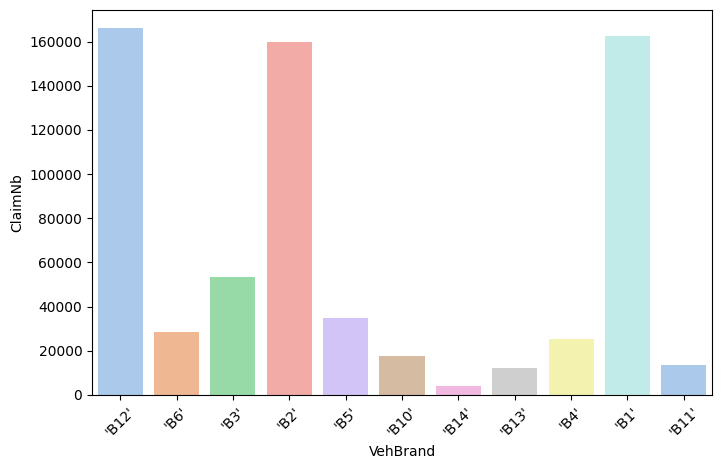

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="VehBrand", y="ClaimNb", data=df1,palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.countplot(x=df1['VehBrand'],palette="pastel")
plt.show()

<font size='+4' color='yellow' >Repartition des gaz <font/>

<Axes: xlabel='VehGas', ylabel='count'>

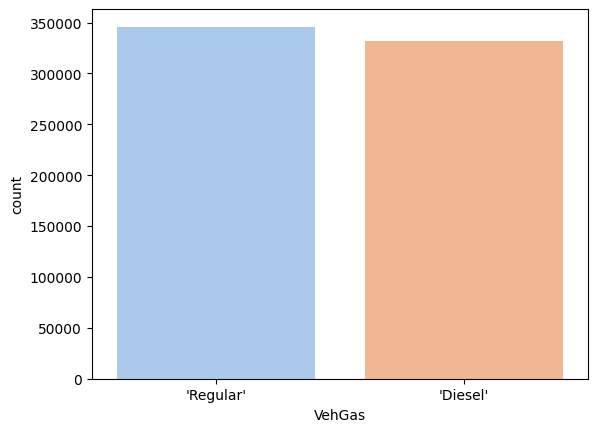

In [17]:
sns.countplot(x=df1['VehGas'],palette="pastel")

<font size='+4' color='yellow' >Nombre de senistre en fonction des marques <font/>

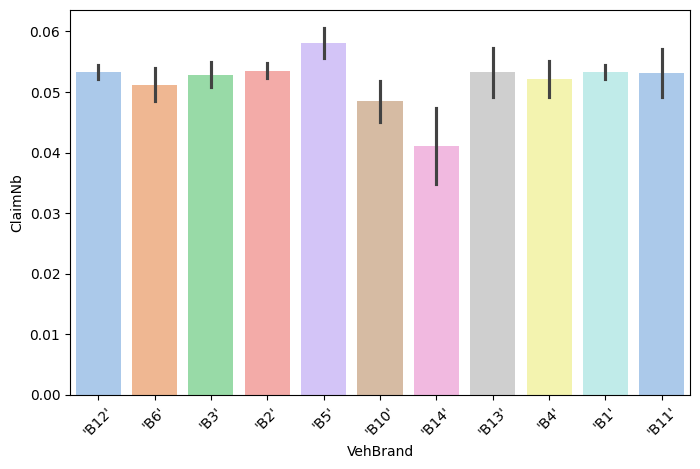

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="VehBrand", y="ClaimNb", data=df1,palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<font size='+4' color='yellow'>Nombre de senistre en fonction des régions <font/>

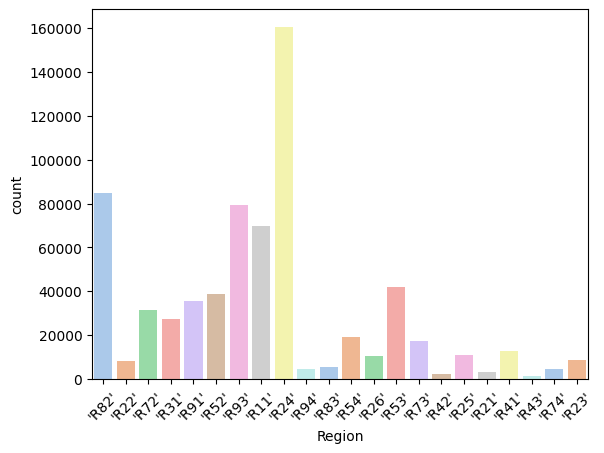

In [19]:
ax=sns.countplot(x=df1['Region'],palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<font size='+4' color='yellow' >Nombre de senistres en fonction de la puissance des vehicules <font/>

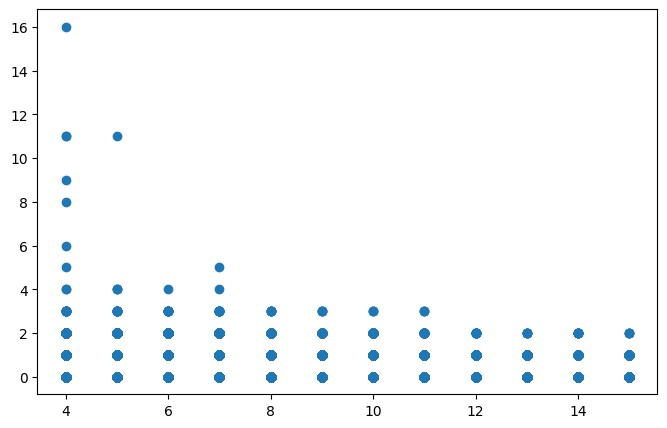

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df1["VehPower"], y=df1["ClaimNb"])
plt.show()

<font size='+4' color='yellow' >Nombre de senistre en fonction de la densité des regions <font/>

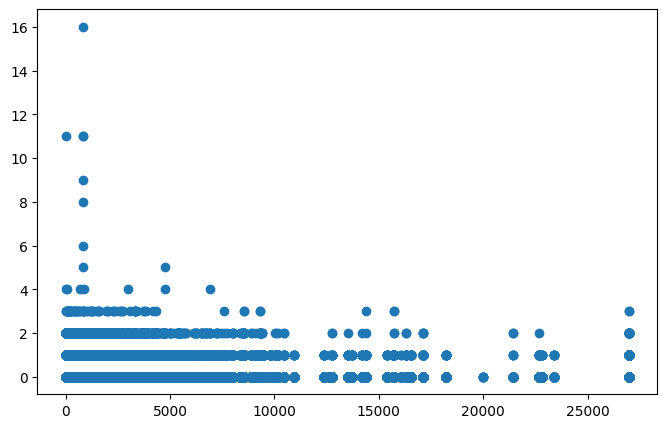

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df1["Density"], y=df1["ClaimNb"])
plt.show()

<font size='+4' color='yellow' >Distribution des montants payés en fonction de l'age des vehicules <font/>

<Axes: xlabel='VehAge', ylabel='ClaimAmount'>

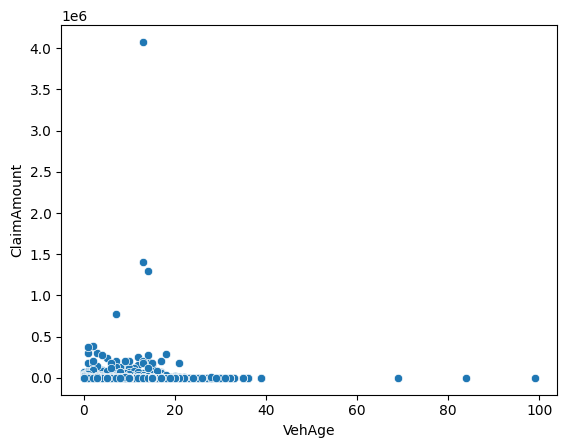

In [22]:
sns.scatterplot(x=df_merge['VehAge'],y=df_merge['ClaimAmount'])

<font size='+4' color='yellow' >Transformation des variables carégorielle en one-hote-enconding <font/>

In [23]:
dataset=pd.get_dummies(df_merge,drop_first=True,dtype=int)

In [24]:
dataset=dataset.drop(columns='IDpol')
dataset

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Area_'B',Area_'C',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,1,0.75,7,1,61,50,27000,303.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.14,12,5,50,60,56,1981.84,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.14,4,0,36,85,4792,1456.55,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.62,10,0,51,100,27000,989.64,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.62,10,0,51,100,27000,9844.36,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,1,0.14,7,2,51,50,178,1769.88,0,1,...,0,0,1,0,0,0,0,0,0,0
26440,1,0.17,4,0,35,51,1719,1288.28,0,0,...,0,0,0,0,0,1,0,0,0,0
26441,2,0.17,15,3,36,50,181,10290.00,0,1,...,0,1,0,0,0,0,0,0,0,0
26442,2,0.17,15,3,36,50,181,1940.40,0,1,...,0,1,0,0,0,0,0,0,0,0


<font size='+4' color='blue' >Statistiques descriptives<font/>

In [25]:
dataset[['ClaimNb','Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density','ClaimAmount']].describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04
mean,1.139427,0.691791,6.464415,7.355090,45.121502,65.231054,2015.302942,2.265513e+03
std,0.617563,0.313213,2.017260,5.165475,14.694677,20.143480,4162.639153,2.937103e+04
min,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00
25%,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,115.000000,6.859925e+02
50%,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,524.500000,1.172000e+03
75%,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2252.000000,1.212385e+03
max,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06


In [26]:
dataset[['ClaimNb','Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density','ClaimAmount']].median()

ClaimNb           1.00
Exposure          0.76
VehPower          6.00
VehAge            7.00
DrivAge          45.00
BonusMalus       55.00
Density         524.50
ClaimAmount    1172.00
dtype: float64

<font size='+4' color='orange' >Selection de modele <font/>

In [27]:
label=dataset['ClaimAmount']
feature=dataset.drop(columns='ClaimAmount')

In [28]:
feature

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'B',Area_'C',Area_'D',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,1,0.75,7,1,61,50,27000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.14,12,5,50,60,56,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.14,4,0,36,85,4792,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.62,10,0,51,100,27000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.62,10,0,51,100,27000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,1,0.14,7,2,51,50,178,0,1,0,...,0,0,1,0,0,0,0,0,0,0
26440,1,0.17,4,0,35,51,1719,0,0,1,...,0,0,0,0,0,1,0,0,0,0
26441,2,0.17,15,3,36,50,181,0,1,0,...,0,1,0,0,0,0,0,0,0,0
26442,2,0.17,15,3,36,50,181,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Separation train valid test

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,label,train_size=0.7,random_state=42)

## Normalisation

In [79]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

## Regression Lineaire

In [98]:
clf=LinearRegression()
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
err_lin=mean_absolute_error(pred,Y_test)
err_lin

2531.5619028364918

In [88]:
lambdas = np.logspace(-3,6,100)

In [90]:
ridge = RidgeCV(alphas=lambdas)
ridge.fit(X_train, Y_train)
best_alpha=ridge.alpha_
print(f"Best lambda is {best_alpha}")

Best lambda is 28480.35868435805


In [95]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, Y_train)
pred = ridge.predict (X_test)
er_ridge=mean_absolute_error(pred,Y_test)

# Arbre Decision

In [93]:
clf=tree.DecisionTreeRegressor()
clf.fit(X_train,Y_train)
predi=clf.predict(X_test)
err_tree=mean_absolute_error(predi,Y_test)
err_tree

3644.512878444134

# Gradient Boosting

In [94]:
clf=GradientBoostingRegressor()
clf.fit(X_train,Y_train)
predi=clf.predict(X_test)
err_grad=mean_absolute_error(predi,Y_test)
err_grad

2715.152874801304

Text(0, 0.5, 'Mean absolute Error')

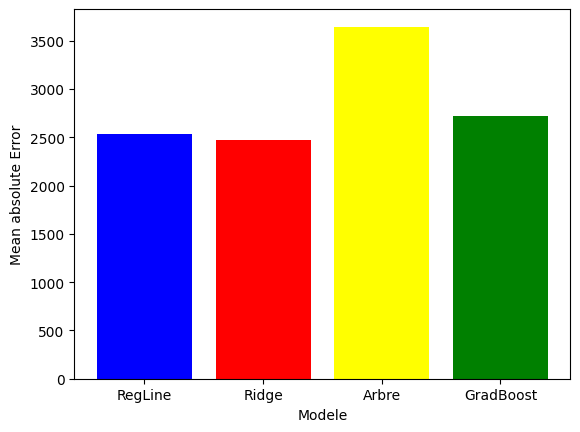

In [100]:
model=['RegLine','Ridge','Arbre','GradBoost']
errer=[err_lin,er_ridge,err_tree,err_grad]
color=['blue','red','yellow','green']
plt.bar(model,errer,color=color)
plt.xlabel('Modele')
plt.ylabel('Mean absolute Error')
